![](https://tse4.mm.bing.net/th?id=OIP.YGia3gMiDXp6hS4e8odEdQHaE8&pid=15.1&P=0&w=251&h=168)
# Aerial Cactus Identification
## Determine whether an image contains a columnar cactus

## In this kernel, we will implement a minimal "FastAI" classifier  using pretrained model densenet161.

FastAi is a research lab with the mission of making AI accessible by providing an easy to use library build on top of PyTorch, as well as exceptionally good tutorials/courses like the Practical Deep Learning for Coders course which I am currently enrolled in.

In this Kernel, we will learn how to use FastAI to work through a simple computer vision example. 
You will know how to perform the following basic steps:
* Download image dataset
* Load and view your data
* Create and train a model
* Clear your dataset
* Interpret the results


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai import * # General FastAi
from fastai.vision import * # FastAI for Image data

## Let's read the dataset, perform some data augmentation and display few  image samples.

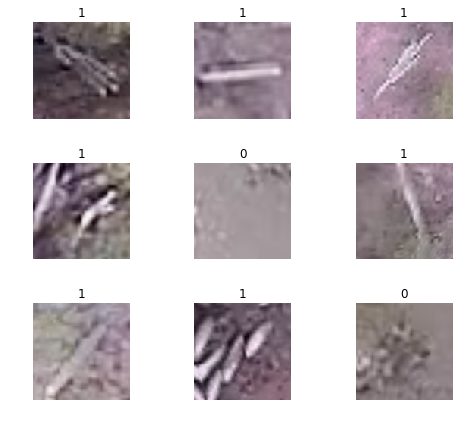

In [2]:
train_df = pd.read_csv("../input/train.csv") #read train labels
test_df = pd.read_csv("../input/sample_submission.csv") #read test labels
test_img = ImageList.from_df(test_df, path='../input/test', folder='test') #read test images
trfm = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
train_img = (ImageList.from_df(train_df, path='../input/train', folder='train') #read train images
        .split_by_rand_pct(0.01)
        .label_from_df()
        .add_test(test_img)
        .transform(trfm, size=128)
        .databunch(path='.', bs=64, device= torch.device('cuda:0'))
        .normalize(imagenet_stats)
       )
train_img.show_batch(rows=3, figsize=(7,6)) # display 9 images from train dataset

## Time to load the pretrained model densenet161, build a CNN and the initial learning rate of our model. 

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.torch/models/densenet161-8d451a50.pth
115730790it [00:04, 26234925.86it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


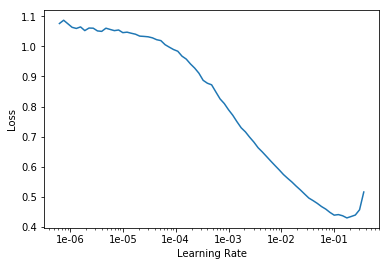

In [3]:
learn = cnn_learner(train_img, models.densenet161, metrics=[error_rate, accuracy]) # define type of model for the learning 
learn.lr_find() # measure the learning rate of our model
learn.recorder.plot() # plot measured learning rate

# Time to train our model.

In [4]:
lr = 3e-02 # according Jeremy Howard advise...
learn.fit_one_cycle(2, slice(lr)) # Train for 2 Epoch (=2 cycles)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.068005,0.000368,0.000000,1.000000,01:17
1,0.009938,0.000314,0.000000,1.000000,01:11


# Perfection is reached...
# We can predict presence of cactus in the images of our test set.

In [5]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test) # do prediction
test_df.has_cactus = preds.numpy()[:, 0] # fill the submission form
test_df.to_csv('submission.csv', index=False) # save the submission file